In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from datetime import datetime
import datetime as dt
import plotly.graph_objects as go
import plotly.express as px

ModuleNotFoundError: No module named 'missingno'

In [3]:
df= pd.read_csv("Walmart DataSet.csv")

In [4]:
df.head

<bound method NDFrame.head of       Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

         

In [5]:
df.isnull()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
6430,False,False,False,False,False,False,False,False
6431,False,False,False,False,False,False,False,False
6432,False,False,False,False,False,False,False,False
6433,False,False,False,False,False,False,False,False


In [6]:
df.describe

<bound method NDFrame.describe of       Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

     

<AxesSubplot: >

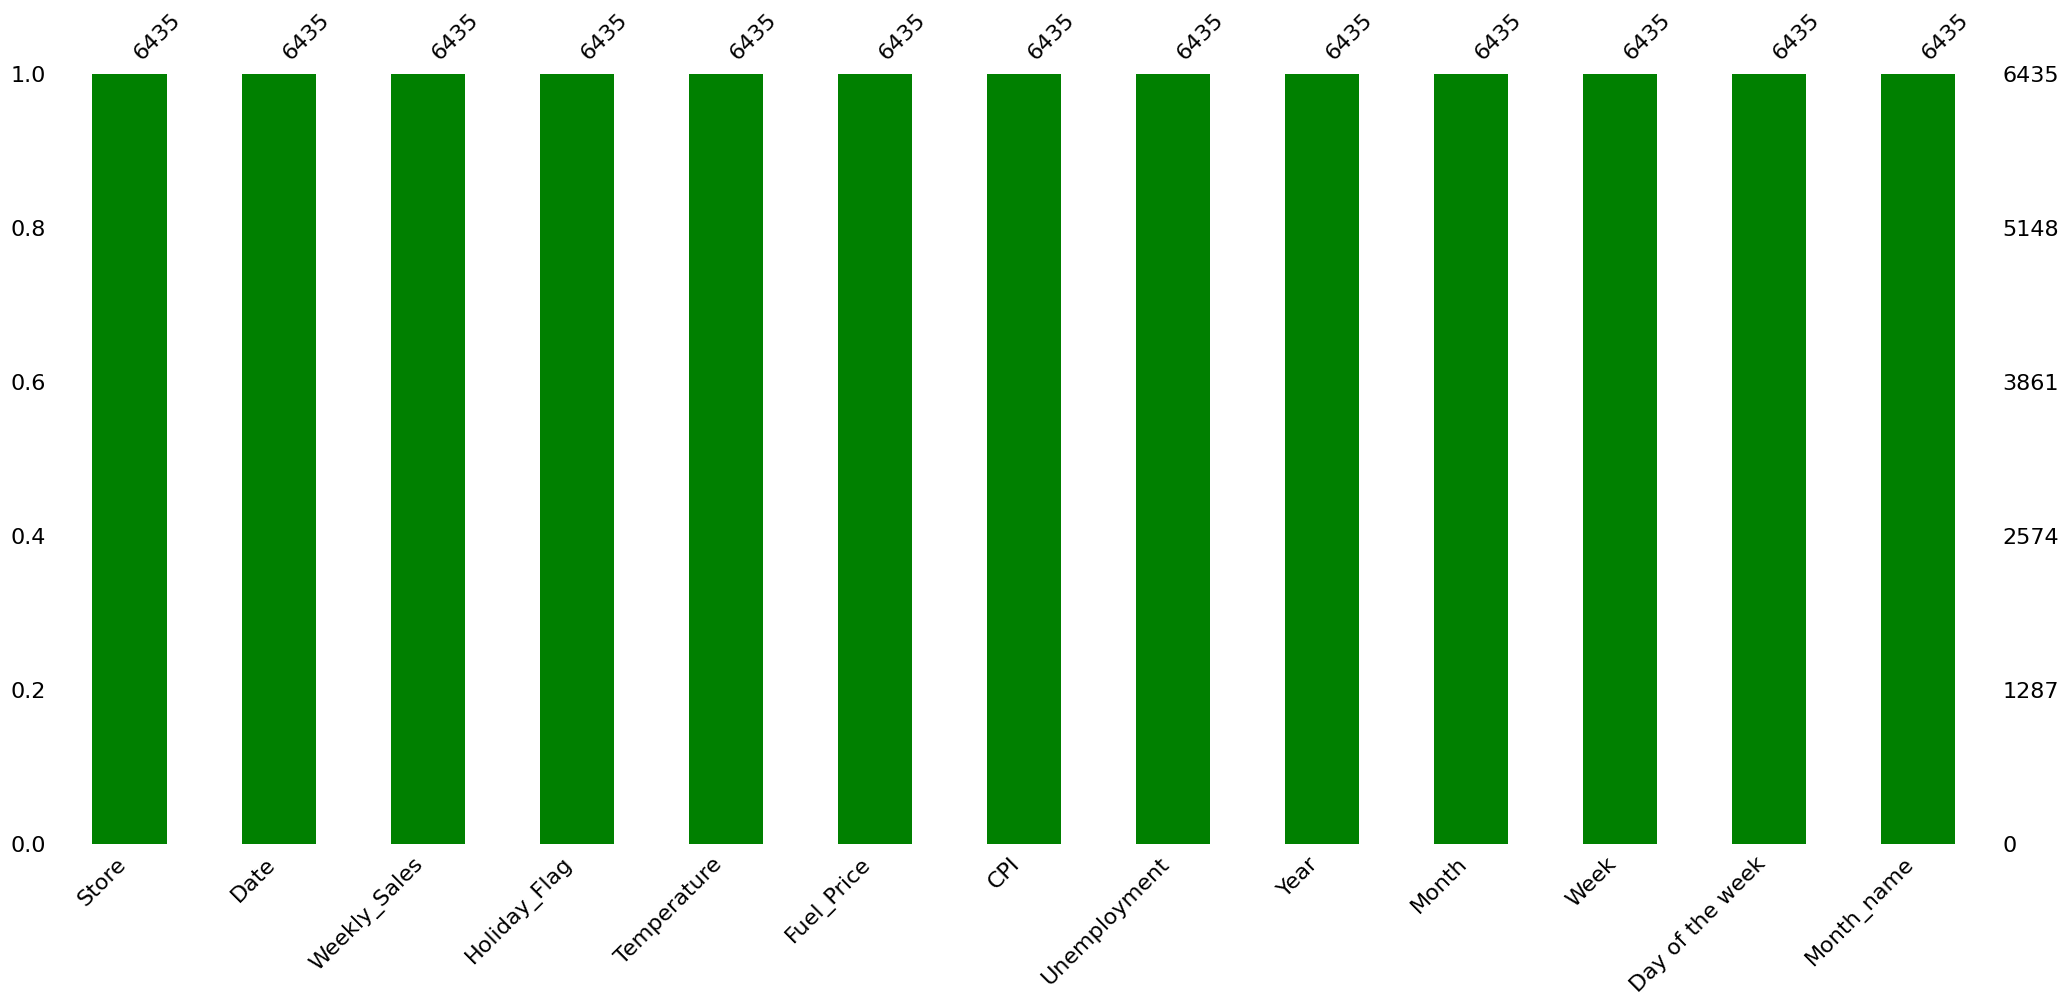

In [29]:
msno.bar(df, color="green")   #Checking null values

In [8]:
#Null values by column percentege
df.isnull().mean().round(4)*100

Store           0.0
Date            0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
dtype: float64

In [9]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [10]:
df['Date'] =  pd.to_datetime(df['Date'])

C:\Users\Shraddha\AppData\Local\Temp\ipykernel_5260\2493255447.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] =  pd.to_datetime(df['Date'])


In [11]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Week"] = df["Date"].dt.isocalendar().week
df["Day of the week"]= df["Date"].dt.day_name()
df['Month_name'] = df['Date'].dt.month_name()

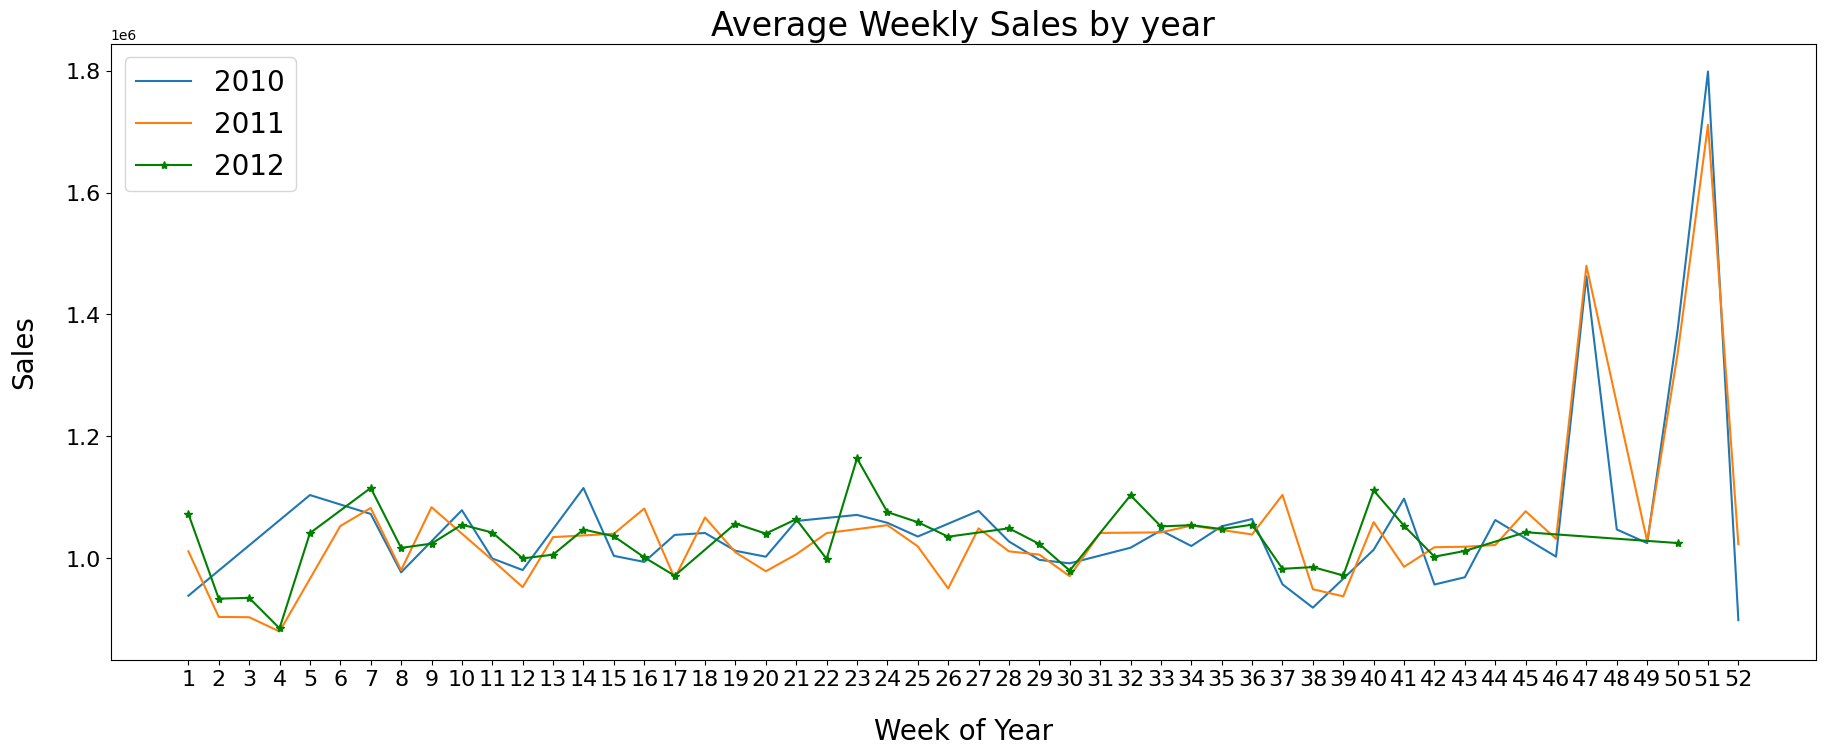

In [12]:
# Sales analysis by week
weekly_sales_2010 = df[df['Year']==2010].groupby('Week')['Weekly_Sales'].mean()
weekly_sales_2011 = df[df['Year']==2011].groupby('Week')['Weekly_Sales'].mean()
weekly_sales_2012 = df[df['Year']==2012].groupby('Week')['Weekly_Sales'].mean()

plt.figure(figsize=(22,8))
plt.plot(weekly_sales_2010.index, weekly_sales_2010.values)
plt.plot(weekly_sales_2011.index, weekly_sales_2011.values)
plt.plot(weekly_sales_2012.index, weekly_sales_2012.values, '*-g')

plt.xticks(np.arange(1, 53, step=1), fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Week of Year', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)

plt.title("Average Weekly Sales by year", fontsize=24)
plt.legend(['2010', '2011', '2012'], fontsize=20)  

In [13]:
best_stores = df[df['Store'].isin([20,4,14,13,2])]
fig = px.box(best_stores, y='Weekly_Sales', x='Store', color="Store", 
             title="Top 5 store distribution analysis",
             template='plotly+presentation',
             color_discrete_sequence = px.colors.qualitative.Set1)
            
fig.update_layout(
    title={
        'y':0.92,
        'x':0.5},
    font=dict(
        family='Trebuchet MS',
        size=15),
    legend={
        'y': 0.85,
        'x': 0.85,
        'xanchor': 'right',
        'yanchor': 'top'},
    yaxis_title = 'Sales',
    xaxis_title = 'Store',
    showlegend = False,
    xaxis=dict(type='category')
)

fig.update_xaxes(categoryorder='total descending')

fig.show()

In [14]:
# Holiday analysis
holiday = {6:"Super Bowl", 36:"Labor day", 47:"Thanksgiving", 51:"Christmas"}

#sales average by holiday
holidays = df[df["Week"].isin([6,36,47,51])]
holiday_mean = holidays[["Weekly_Sales", "Week"]].groupby("Week").mean().reset_index().sort_values('Weekly_Sales', ascending=False)
holiday_mean = holiday_mean.rename(columns={"Week":"Holiday"})
holiday_mean["Holiday"] = holiday_mean["Holiday"].map(holiday)
holiday_mean

,Holiday,Weekly_Sales
3,Christmas,1.754774e+06
2,Thanksgiving,1.471273e+06
0,Super Bowl,1.052969e+06
1,Labor day,1.052913e+06


In [15]:
fig = px.bar(holiday_mean, x="Holiday", y="Weekly_Sales", 
             color="Holiday",
             title = 'Sales average by holiday',
             template = 'plotly+presentation',
             text_auto=".2s",
             color_discrete_sequence = px.colors.qualitative.Pastel)

fig.update_layout(
    title={
        'y':0.92,
        'x':0.5},
    font=dict(
        family='Trebuchet MS',
        size=15),
    yaxis_title = 'Sales',
    xaxis_title = 'Holiday',
)

fig.update_traces(textfont_size=14, 
                  textposition="inside", 
                  )


fig.show()

In [16]:
#Relationship analysis
analysis_2011 = df.query('Year== 2011') 
temp_2011 = analysis_2011[['Temperature', 'Weekly_Sales']].groupby('Temperature').sum()

In [17]:
fig = go.Figure()

fig.add_trace(
    go.Scattergl(
        x=analysis_2011['Temperature'], y=analysis_2011["Weekly_Sales"],
        mode = 'markers',
        marker = dict(
            line = dict(
                width = 1)
        )
    )
)
fig.update_layout(
    template = 'plotly+presentation',
    title={
        'text': 'Sales by temperature in 2011',
        'y':0.92,
        'x':0.5},
    font=dict(
        family='Trebuchet MS',
        size=15),
    yaxis_title = 'Sales',
    xaxis_title = 'Temperature (°F)',
)
fig.show()


detecting and removing outliers

In [18]:
# Coefficient of mean to standard deviation
coef_mean_std = pd.DataFrame(df.groupby('Store')['Weekly_Sales'].std() / df.groupby('Store')['Weekly_Sales'].mean())
coef_mean_std = coef_mean_std.rename(columns={'Weekly_Sales':'Coefficient of mean to standard deviation'})
coef_mean_std

,Coefficient of mean to standard deviation
Store,
1,0.100292
2,0.123424
3,0.115021
4,0.127083
5,0.118668
6,0.135823
7,0.197305
8,0.116953
9,0.126895


C:\Users\Shraddha\AppData\Local\Temp\ipykernel_5260\3887511690.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




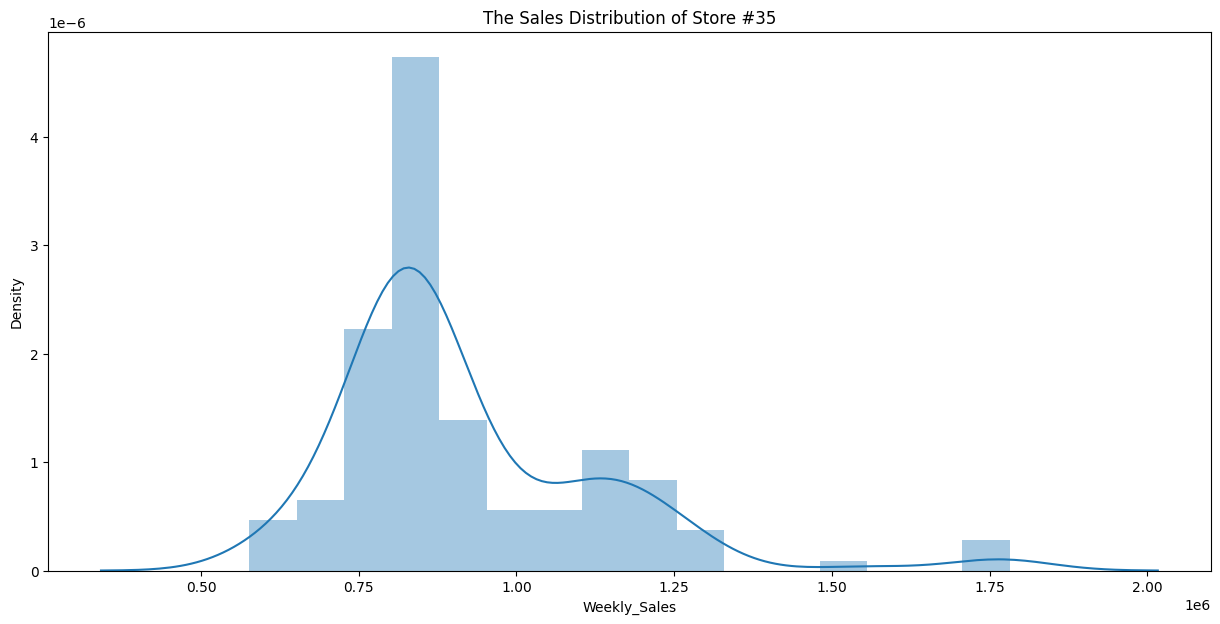

In [19]:
# Distribution of store has maximum coefficient of mean to standard deviation
coef_mean_std_max = coef_mean_std.sort_values(by='Coefficient of mean to standard deviation')
plt.figure(figsize=(15,7))
sns.distplot(df[df['Store'] == coef_mean_std_max.tail(1).index[0]]['Weekly_Sales'])
plt.title('The Sales Distribution of Store #'+str(coef_mean_std_max.tail(1).index[0]));

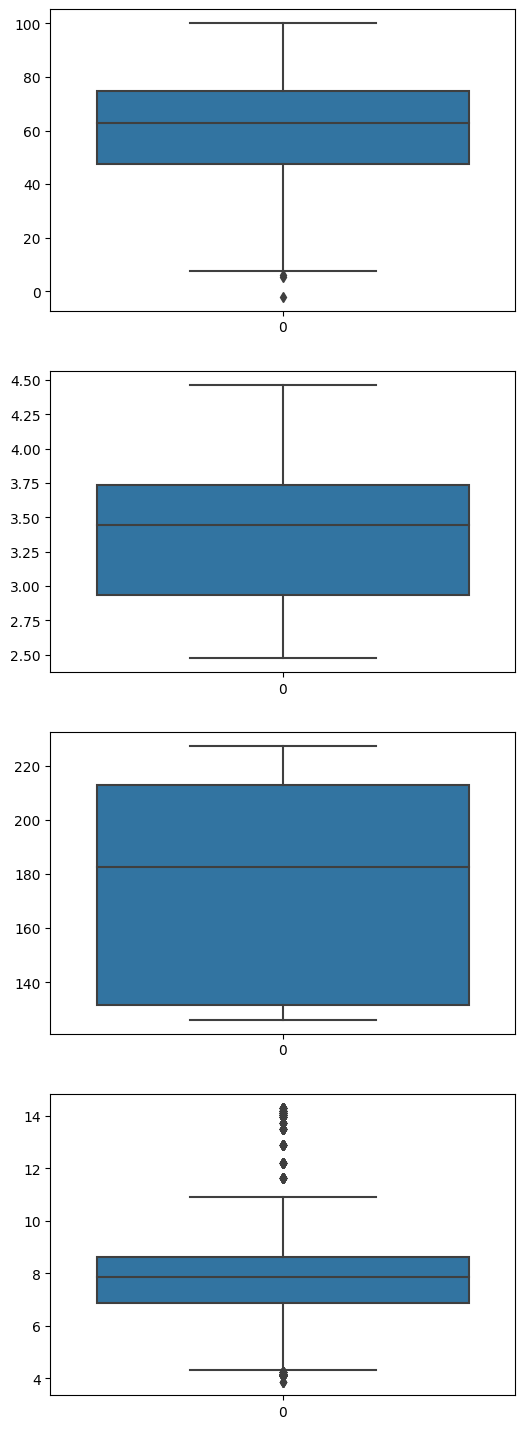

In [20]:
# find outliers 
fig, axs = plt.subplots(4,figsize=(6,18))
X = df[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(df[column], ax=axs[i])

In [21]:
# drop the outliers     
data_new = df[(df['Unemployment']<10) & (df['Unemployment']>4.5) & (df['Temperature']>10)]
data_new

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day of the week,Month_name
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,17,Sunday,May
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,48,Thursday,December
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,Friday,February
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,Friday,February
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,18,Monday,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,39,Friday,September
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,19,Thursday,May
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,50,Monday,December
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,42,Friday,October


The worst performing store, and how significant is the difference between the
highest and lowest performing stores.


In [22]:


# group data by store and calculate total sales
store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

# find the worst performing store
worst_store = store_sales.loc[store_sales['Weekly_Sales'].idxmin()]

# output the worst performing store
print('The worst performing store is Store', worst_store['Store'], 'with total sales of $', worst_store['Weekly_Sales'])

# find the highest and lowest performing stores
highest_sales = store_sales['Weekly_Sales'].max()
lowest_sales = store_sales['Weekly_Sales'].min()

# calculate the difference between the highest and lowest performing stores
sales_diff = highest_sales - lowest_sales

# output the difference between the highest and lowest performing stores
print('The difference between the highest and lowest performing stores is $', sales_diff)


The worst performing store is Store 33.0 with total sales of $ 37160221.96
The difference between the highest and lowest performing stores is $ 264237570.49999997


Best store analysis



In [23]:
store20 = df[df['Store'] == 20]
store20 = store20[['Date','Weekly_Sales']]
store20 = store20.groupby('Date').sum()
store20.reset_index(inplace = True)

store20['Date'] = pd.to_datetime(store20['Date']) #converting 'date' column to a datetime type
store20.columns=['ds','y'] #Rename columns
store20

,ds,y
0,2010-01-10,1933719.21
1,2010-02-04,2405395.22
2,2010-02-07,2143676.77
3,2010-02-19,2161549.76
4,2010-02-26,1898193.95
...,...,...
138,2012-10-08,2144245.39
139,2012-10-19,1999363.49
140,2012-10-26,2031650.55
141,2012-11-05,2168097.11


In [24]:
y_train = store20.iloc[:120]
y_test = store20.iloc[120:]

forecasting the sales for each store for the next 12
weeks.

In [25]:
# import libraries

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = df.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})






In [26]:
# create model for each store
store_ids = df['Store'].unique()
forecast_dfs = []
for store_id in store_ids:
    store_data = df[df['Store'] == store_id]

In [35]:
 # split data into training and testing sets
train = store_data[:-12]
test = store_data[-12:]
    
    # create features for time series analysis
train['year'] = train['Date'].dt.year
train['month'] = train['Date'].dt.month
train['day'] = train['Date'].dt.day
train['dayofweek'] = train['Date'].dt.dayofweek
    

C:\Users\Shraddha\AppData\Local\Temp\ipykernel_5260\3831322569.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Shraddha\AppData\Local\Temp\ipykernel_5260\3831322569.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Shraddha\AppData\Local\Temp\ipykernel_5260\3831322569.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [36]:
 # fit linear regression model
lr = LinearRegression()
lr.fit(train[['Year', 'Month', 'day', 'dayofweek']], train['Weekly_Sales'])
    
    

LinearRegression()

In [ ]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Week',
       'Day of the week', 'Month_name'],
      dtype='object')

In [39]:
# make future predictions
future_dates = pd.date_range(start=train['Date'].max(), periods=12, freq='W')
future_data = pd.DataFrame({'Date': future_dates})
future_data['Year'] = future_data['Date'].dt.year
future_data['Month'] = future_data['Date'].dt.month
future_data['day'] = future_data['Date'].dt.day
future_data['dayofweek'] = future_data['Date'].dt.dayofweek
future_data['yhat'] = lr.predict(future_data[['Year', 'Month', 'day', 'dayofweek']])

In [40]:
 # store forecast in dataframe
forecast_df = future_data[['Date', 'yhat']]
forecast_df = forecast_df.rename(columns={'yhat': 'yhat_' + str(store_id)})
forecast_dfs.append(forecast_df)
    
# combine forecasts for all stores
combined_forecast = forecast_dfs[0]
for i in range(1, len(forecast_dfs)):
    combined_forecast = pd.merge(combined_forecast, forecast_dfs[i], on='ds')


In [41]:
# output final forecast
print(combined_forecast.tail(12))

         Date        yhat_45
0  2012-11-11  833937.699525
1  2012-11-18  839481.151455
2  2012-11-25  845024.603385
3  2012-12-02  838196.450003
4  2012-12-09  843739.901932
5  2012-12-16  849283.353862
6  2012-12-23  854826.805792
7  2012-12-30  860370.257721
8  2013-01-06  714126.334548
9  2013-01-13  719669.786478
10 2013-01-20  725213.238407
11 2013-01-27  730756.690337
